# PCA

## PCA Implementation
Select a set of grayscale images (e.g., faces, landscapes, or any other category).
Normalize the images by scaling pixel values to a range [0, 1].

1. Convert the image into a 2D matrix where each row represents an image and each column
represents a pixel value.
2. Compute the covariance matrix of the image data.
3. Calculate the eigenvalues and eigenvectors of the covariance matrix.
4. Sort the eigenvectors based on the eigenvalues in descending order.
5. Select the top k eigenvectors to form the principal components.
6. Project the original images onto the lower-dimensional subspace defined by the selected
principal components.

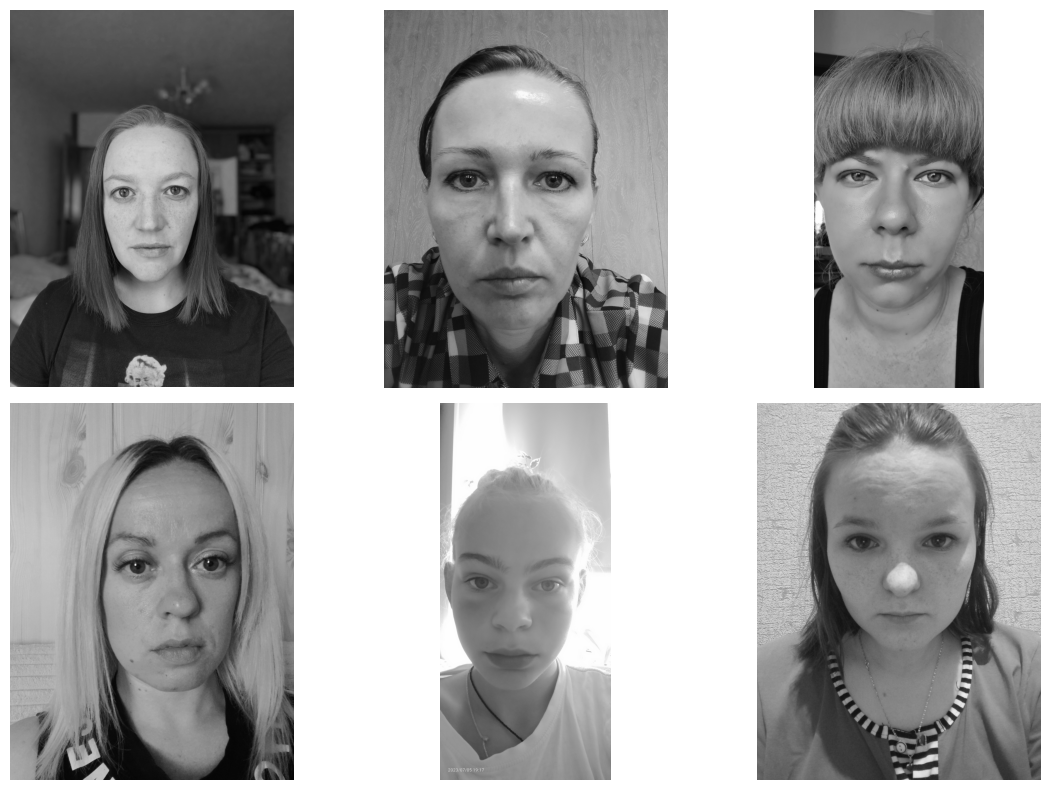

In [16]:
import os
from PIL import Image
import matplotlib.pyplot as plt
# Folder containing the grayscale images
folder_path = "Grayscale portrait"  # Corrected folder name

image_paths = [os.path.join(folder_path, img) for img in ['Neutral.jpg', 'Neutral_2.jpg', 'Neutral_3.jpg', 'Neutral_4.jpg', 'Neutral_5.jpg', 'Neutral_6.jpg']]

# Create a grid of 2x3 to display the images
n_rows = 2
n_cols = 3
# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.ravel()

# Check if the folder exists
if not os.path.exists(folder_path):
    raise FileNotFoundError(f"The directory '{folder_path}' does not exist.")


for i in range(6):
    img = Image.open(image_paths[i])  # Open image
    axes[i].imshow(img)  # Display image in respective subplot
    axes[i].axis('off')  # Hide axes

# Display the grid
plt.tight_layout()
plt.show()




## Normalizing the pictures

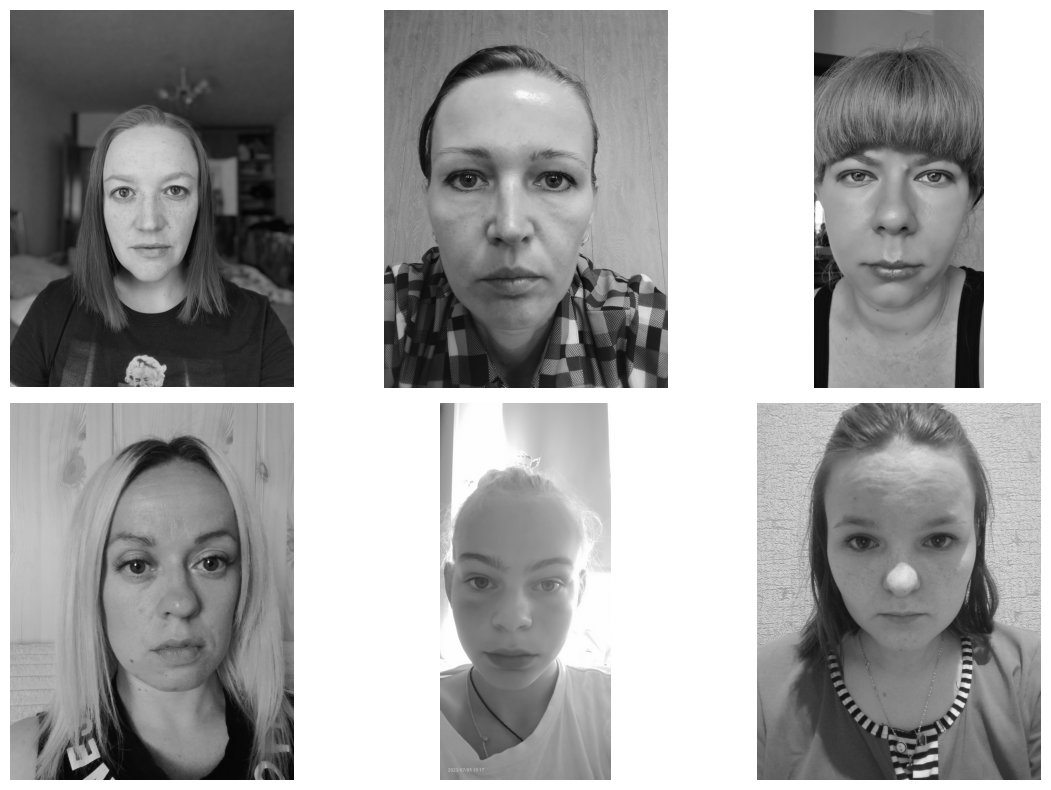

In [22]:
import numpy as np

# Create a new figure and a grid of subplots for normalized images
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.ravel()

for i in range(6):
    img = Image.open(image_paths[i])  # Open image
    img_array = np.array(img)  # Convert image to NumPy array

    normalized_img = img_array / 255.0  # Normalize the image

    axes[i].imshow(normalized_img, cmap='gray')  # Display normalized image in respective subplot
    axes[i].axis('off')  # Hide axes

# Display the grid
plt.tight_layout()
plt.show()

## Converting into 2D

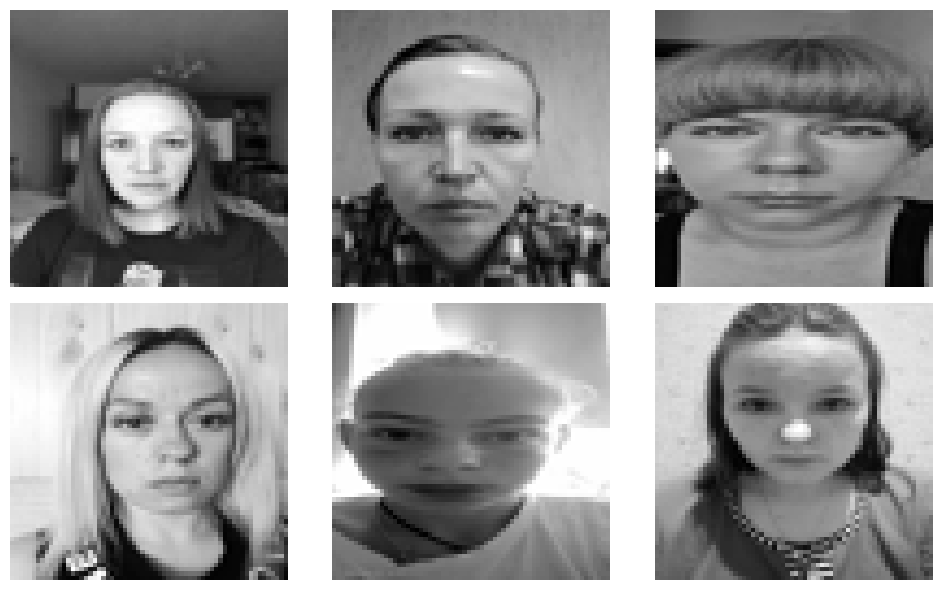

In [34]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# Path to the folder containing the images (make sure to set it)
folder_path = 'Grayscale portrait'  # Replace with your actual folder path

# List of image paths
image_paths = [os.path.join(folder_path, img) for img in ['Neutral.jpg', 'Neutral_2.jpg', 'Neutral_3.jpg', 'Neutral_4.jpg', 'Neutral_5.jpg', 'Neutral_6.jpg']]

# Define the desired image size (e.g., 64x64)
fixed_size = (64, 64)
images = []

# Load, resize, grayscale, and normalize the images between 0 and 1
for path in image_paths:
    img = Image.open(path).convert('L')  # Convert to grayscale
    img_resized = img.resize(fixed_size)  # Resize to fixed dimensions
    img_array = np.array(img_resized) / 255.0  # Normalize pixel values between 0 and 1
    images.append(img_array)

# Display the images in a 2x3 grid
n_rows = 2
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))  # Create 2x3 grid of subplots
axes = axes.ravel()  # Flatten axes array to iterate over easily

for i in range(len(images)):
    axes[i].imshow(images[i], cmap='gray')  # Show each grayscale image
    axes[i].axis('off')  # Hide axis for each subplot

plt.tight_layout()
plt.show()



In [37]:
import numpy as np
from PIL import Image
import os

# Path to the folder containing the images
folder_path = 'Grayscale portrait'

# List of image paths
image_paths = [os.path.join(folder_path, img) for img in ['Neutral.jpg', 'Neutral_2.jpg', 'Neutral_3.jpg', 'Neutral_4.jpg', 'Neutral_5.jpg', 'Neutral_6.jpg']]

# Define the desired image size (e.g., 64x64) to ensure consistency in dimensions
fixed_size = (64, 64)
images = []

# Load, resize, grayscale, and normalize the images between 0 and 1
for path in image_paths:
    img = Image.open(path).convert('L')  # Convert to grayscale
    img_resized = img.resize(fixed_size)  # Resize to fixed dimensions
    img_array = np.array(img_resized) / 255.0  # Normalize pixel values between 0 and 1
    images.append(img_array)

# Flatten each image (convert to 1D arrays)
flattened_images = [img.flatten() for img in images]

# Stack the flattened images into a 2D matrix (each row is an image, each column is a pixel)
image_matrix = np.stack(flattened_images)

display(image_matrix)
# Check the shape of the resulting 2D matrix
print("Shape of the 2D matrix:", image_matrix.shape)

array([[0.3372549 , 0.3372549 , 0.34117647, ..., 0.16078431, 0.15686275,
        0.15686275],
       [0.38431373, 0.38823529, 0.41176471, ..., 0.23529412, 0.14901961,
        0.2       ],
       [0.35294118, 0.36078431, 0.36470588, ..., 0.04705882, 0.41176471,
        0.60392157],
       [0.68627451, 0.67843137, 0.67843137, ..., 0.29019608, 0.1254902 ,
        0.03137255],
       [0.40784314, 0.4745098 , 0.5372549 , ..., 0.54901961, 0.52156863,
        0.52941176],
       [0.74117647, 0.74117647, 0.74901961, ..., 0.36862745, 0.3254902 ,
        0.37254902]])

Shape of the 2D matrix: (6, 4096)


## Computing Covarians

In [38]:
# Compute the covariance matrix of the image data
cov_matrix = np.cov(image_matrix, rowvar=False)

# Display the shape of the covariance matrix
print("Shape of the covariance matrix:", cov_matrix.shape)

# Optionally, display a part of the covariance matrix to inspect
print("Covariance matrix (first 5x5 block):")
print(cov_matrix[:5, :5])

Shape of the covariance matrix: (4096, 4096)
Covariance matrix (first 5x5 block):
[[0.03229937 0.03066923 0.02941023 0.02879815 0.02881148]
 [0.03066923 0.02978957 0.02915186 0.02895194 0.02906984]
 [0.02941023 0.02915186 0.0290842  0.02918877 0.02937947]
 [0.02879815 0.02895194 0.02918877 0.02955786 0.02981007]
 [0.02881148 0.02906984 0.02937947 0.02981007 0.03008945]]


## Calculate Eigenvalues and Eigenvectors

In [39]:
# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Display the eigenvalues and eigenvectors
print("Eigenvalues:", eigenvalues)
print("Eigenvectors (first 5):", eigenvectors[:, :5])

Eigenvalues: [-1.34715374e-13 -6.04607126e-14 -4.68275485e-14 ...  2.43473220e+01
  2.84421038e+01  9.52567245e+01]
Eigenvectors (first 5): [[ 1.12051188e-02  0.00000000e+00 -6.00360023e-02  0.00000000e+00
   0.00000000e+00]
 [ 1.07754316e-03  4.25262278e-03  4.43704338e-01  4.83826354e-03
   1.58880718e-03]
 [-9.73711707e-01 -2.67410319e-04  7.73617752e-02 -4.93772249e-04
  -1.01063050e-02]
 ...
 [-1.02300594e-03 -3.30977140e-03  3.38501113e-03  6.20654850e-04
   3.12158857e-03]
 [-2.34673182e-03  3.07358297e-03 -1.35913208e-03 -9.60721526e-03
  -9.59270345e-04]
 [ 2.73484671e-03 -3.07454651e-03  3.70236143e-03  3.58226345e-03
  -1.86342562e-02]]


In [40]:
# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Display the sorted eigenvalues and eigenvectors
print("Sorted Eigenvalues:", sorted_eigenvalues)
print("Sorted Eigenvectors (first 5):", sorted_eigenvectors[:, :5])

Sorted Eigenvalues: [ 9.52567245e+01  2.84421038e+01  2.43473220e+01 ... -4.68275485e-14
 -6.04607126e-14 -1.34715374e-13]
Sorted Eigenvectors (first 5): [[-0.00707987 -0.00757524 -0.02811883 -0.00483892 -0.02013605]
 [-0.00890056 -0.00699558 -0.02597308 -0.002126   -0.01689692]
 [-0.0106483  -0.00745307 -0.02358535 -0.00074236 -0.01440424]
 ...
 [-0.01510872 -0.01297367 -0.00351075  0.00915366  0.0101038 ]
 [-0.00905452  0.0143344   0.00817512  0.02346367 -0.00043058]
 [-0.00711568  0.02440385  0.01867413  0.02911929 -0.01233676]]


In [119]:
# Number of principal components to select
k = 1000000

# Select the top k eigenvectors
principal_components = sorted_eigenvectors[:, :k]

# Display the shape of the principal components matrix
print("Size of the principal components matrix:", principal_components.shape)

Size of the principal components matrix: (4096, 4096)


Shape of the projected images matrix: (6, 4096)


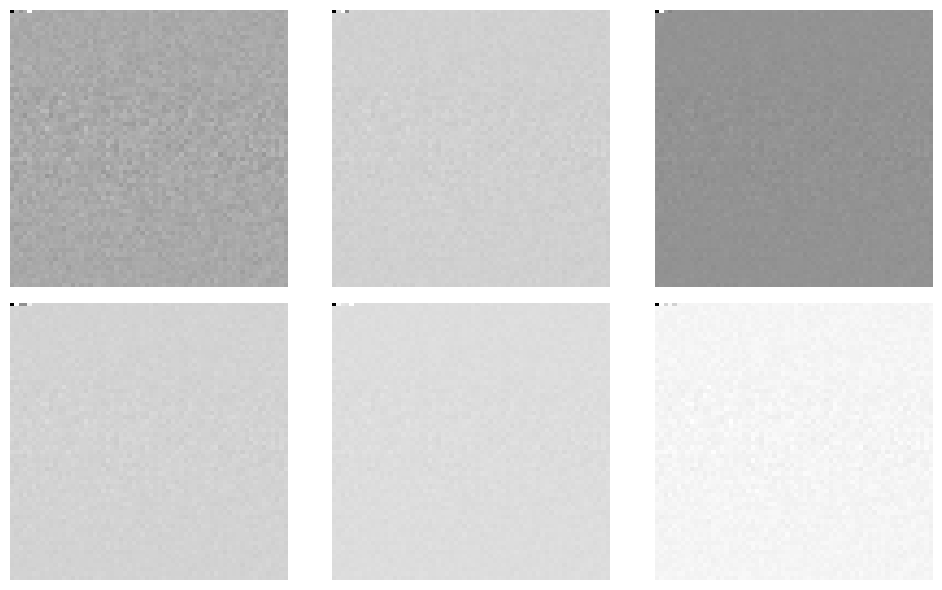

In [120]:
# Assuming principal_components is of shape (n_pixels, k)
k = principal_components.shape[1]  # Number of principal components
original_images = []
for path in image_paths:
    img = Image.open(path).convert('L')  # Convert to grayscale
    img_resized = img.resize(fixed_size)  # Resize to fixed dimensions
    img_array = np.array(img_resized) / 255.0  # Normalize pixel values between 0 and 1
    original_images.append(img_array.flatten())  # Flatten the image and add to the list

# Stack the flattened images into a 2D matrix (each row is an image, each column is a pixel)
original_image_matrix = np.stack(original_images)
# Project the original images onto the lower-dimensional subspace
projected_images = np.dot(original_image_matrix, principal_components)

# Display the shape of the projected images matrix
print("Shape of the projected images matrix:", projected_images.shape)

# Optionally, display the projected images
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))
axes = axes.ravel()

# Try to reshape based on the number of principal components
# For visualization, you can reshape it into a square matrix if k is a perfect square
if int(np.sqrt(k)) ** 2 == k:  # Check if k is a perfect square
    reshaped_size = (int(np.sqrt(k)), int(np.sqrt(k)))
else:
    reshaped_size = (k, )  # Just display the 1D array

# Loop through and display the projected images
for i in range(len(projected_images)):
    # If reshaped_size is 1D (not a perfect square), we visualize the 1D array as a heatmap
    if len(reshaped_size) == 1:
        axes[i].imshow(projected_images[i].reshape(-1, 1), cmap='gray', aspect='auto')  # Display 1D heatmap
    else:
        axes[i].imshow(projected_images[i].reshape(reshaped_size), cmap='gray')  # Reshape to a square if possible
    axes[i].axis('off')

plt.tight_layout()
plt.show()


Shape of the reconstructed images matrix: (6, 4096)


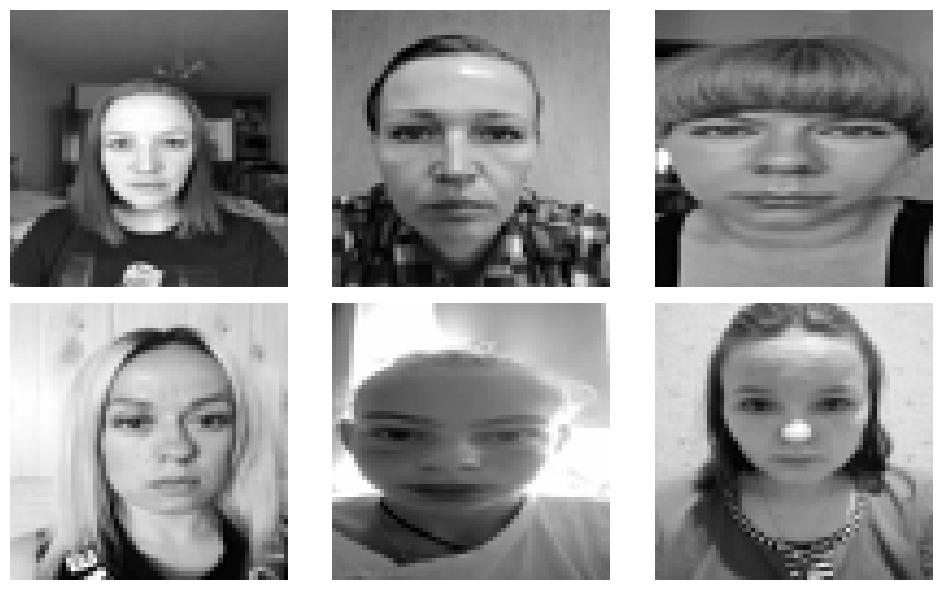

In [121]:
# Reconstruct the images from the lower-dimensional subspace
reconstructed_images = np.dot(projected_images, principal_components.T)

# Display the shape of the reconstructed images matrix
print("Shape of the reconstructed images matrix:", reconstructed_images.shape)

# Optionally, display the reconstructed images
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))
axes = axes.ravel()

for i in range(len(reconstructed_images)):
    axes[i].imshow(reconstructed_images[i].reshape(fixed_size), cmap='gray')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [122]:
# Compute the Mean Squared Error (MSE) between the original and reconstructed images
mse = np.mean((original_image_matrix - reconstructed_images) ** 2)

# Display the MSE
print("Mean Squared Error (MSE) between the original and reconstructed images:", mse)

Mean Squared Error (MSE) between the original and reconstructed images: 1.7854183492690096e-30
